In [1]:
import sys
sys.path.append("../") 

from src.dataprep import transformations
from src.train import trainer
import pandas as pd
from jobtools.arguments import ParamsNamespace

/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_path = "../data/JobLevelData.xlsx"
params_file = "../src/config/cat_boost_classifier.params.yml"

In [3]:
data_frame = pd.read_excel(data_path)
params = ParamsNamespace.load(params_file)
feature_columns = params.data.features

In [5]:
data_frame = transformations.remove_empty_rows(data_frame, "Column 1")
data_frame = transformations.set_low_register(data_frame)
data_frame[feature_columns] = data_frame[feature_columns].applymap(transformations.clean_text)
data_frame["Features"] = transformations.combine_columns(data_frame, feature_columns)

/var/folders/b0/4xdt0q6s4jl21zpmq71dsq880000gn/T/ipykernel_27381/1920382429.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_frame = data_frame.applymap(lambda x: x.lower() if isinstance(x, str) else x)
/var/folders/b0/4xdt0q6s4jl21zpmq71dsq880000gn/T/ipykernel_27381/1920382429.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_frame[feature_columns] = data_frame[feature_columns].applymap(transformations.clean_text)


In [6]:
feature_vector = transformations.apply_multilabel_binarization(data_frame, "Features")

In [7]:
feature_vector

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 0],
       [1, 1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [8]:
tfidf_label = transformations.apply_tfidf_vectorization(data_frame, params.data.label)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_label, feature_vector, test_size=params.data.test_size, random_state=31)

Looking for best combination of parameters with objective neg_log_loss. Parameters are dict_keys(['depth', 'learning_rate', 'l2_leaf_reg', 'iterations'])
Fitting 5 folds for each of 24 candidates, totalling 120 fits
0:	learn: 0.6815936	total: 69.9ms	remaining: 34.9s
0:	learn: 0.6796579	total: 69.5ms	remaining: 34.7s
0:	learn: 0.6790915	total: 69.6ms	remaining: 34.7s
0:	learn: 0.6791206	total: 73.7ms	remaining: 36.8s
0:	learn: 0.6801719	total: 64.9ms	remaining: 32.4s
0:	learn: 0.6380676	total: 74.7ms	remaining: 37.3s
0:	learn: 0.6312015	total: 76.5ms	remaining: 38.2s
0:	learn: 0.6259879	total: 77.9ms	remaining: 38.9s
100:	learn: 0.2399948	total: 804ms	remaining: 3.18s
100:	learn: 0.2480628	total: 800ms	remaining: 3.16s
100:	learn: 0.2381465	total: 1.75s	remaining: 6.9s
100:	learn: 0.2340057	total: 1.73s	remaining: 6.85s
100:	learn: 0.1175390	total: 1.76s	remaining: 6.95s
100:	learn: 0.1146642	total: 1.77s	remaining: 7.01s
100:	learn: 0.2356140	total: 1.94s	remaining: 7.65s
100:	learn: 0

/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.01; total time=   5.9s
400:	learn: 0.1284840	total: 5.99s	remaining: 1.48s
499:	learn: 0.1220195	total: 5.99s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.01; total time=   6.1s
0:	learn: 0.6287695	total: 40.3ms	remaining: 20.1s
0:	learn: 0.6261617	total: 37.5ms	remaining: 18.7s
499:	learn: 0.0432435	total: 6.54s	remaining: 0us
499:	learn: 0.0435862	total: 6.63s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.05; total time=   6.6s
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.05; total time=   6.7s
499:	learn: 0.0497320	total: 6.69s	remaining: 0us
0:	learn: 0.5895958	total: 11.3ms	remaining: 5.66s
499:	learn: 0.1179091	total: 6.79s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.05; total time=   6.8s
0:	learn: 0.5665134	total: 20.3ms	remaining: 10.1s
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learn

/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


0:	learn: 0.5764683	total: 9.85ms	remaining: 4.91s
0:	learn: 0.5719462	total: 14.3ms	remaining: 7.11s
499:	learn: 0.1162852	total: 7.23s	remaining: 0us
499:	learn: 0.1181799	total: 7.26s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.01; total time=   7.4s
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.01; total time=   7.3s
0:	learn: 0.5669241	total: 8.11ms	remaining: 4.05s
0:	learn: 0.6818879	total: 8.39ms	remaining: 4.19s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


100:	learn: 0.1216771	total: 1.64s	remaining: 6.47s
100:	learn: 0.1165642	total: 1.59s	remaining: 6.3s
100:	learn: 0.0816545	total: 1.54s	remaining: 6.09s
100:	learn: 0.0856385	total: 1.6s	remaining: 6.32s
100:	learn: 0.0910073	total: 1.51s	remaining: 5.99s
100:	learn: 0.0912431	total: 1.65s	remaining: 6.5s
100:	learn: 0.0830369	total: 1.6s	remaining: 6.32s
100:	learn: 0.2412730	total: 1.68s	remaining: 6.63s
200:	learn: 0.0839876	total: 3.14s	remaining: 4.67s
200:	learn: 0.0892936	total: 3.28s	remaining: 4.88s
200:	learn: 0.0533412	total: 2.94s	remaining: 4.38s
200:	learn: 0.0519274	total: 2.94s	remaining: 4.37s
200:	learn: 0.0563452	total: 2.96s	remaining: 4.41s
200:	learn: 0.0596054	total: 3.07s	remaining: 4.57s
200:	learn: 0.1739888	total: 3.07s	remaining: 4.56s
200:	learn: 0.0509896	total: 3.1s	remaining: 4.62s
300:	learn: 0.0695866	total: 4.63s	remaining: 3.06s
300:	learn: 0.0643987	total: 4.5s	remaining: 2.98s
300:	learn: 0.0356633	total: 4.25s	remaining: 2.81s
300:	learn: 0.0355

/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


499:	learn: 0.0418023	total: 7.31s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.05; total time=   7.5s
0:	learn: 0.6806483	total: 8.42ms	remaining: 4.2s
499:	learn: 0.0192985	total: 6.77s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.1; total time=   6.8s
0:	learn: 0.6803141	total: 10.1ms	remaining: 5.02s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


499:	learn: 0.0215476	total: 6.76s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.1; total time=   6.9s
499:	learn: 0.0189576	total: 6.97s	remaining: 0us
0:	learn: 0.6795682	total: 13.8ms	remaining: 6.87s
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.1; total time=   7.1s
0:	learn: 0.6393831	total: 8.69ms	remaining: 4.34s
499:	learn: 0.0224677	total: 6.96s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.1; total time=   7.0s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


0:	learn: 0.6278063	total: 8.85ms	remaining: 4.41s
499:	learn: 0.1243492	total: 6.79s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=3, learning_rate=0.01; total time=   6.9s
0:	learn: 0.6333224	total: 23.1ms	remaining: 11.5s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


499:	learn: 0.0179725	total: 7.06s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.1; total time=   7.1s
0:	learn: 0.6316882	total: 15.9ms	remaining: 7.93s
100:	learn: 0.2400423	total: 1.33s	remaining: 5.27s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


100:	learn: 0.2518707	total: 1.3s	remaining: 5.12s
100:	learn: 0.2457852	total: 1.4s	remaining: 5.53s
100:	learn: 0.1236304	total: 1.24s	remaining: 4.91s
100:	learn: 0.1200361	total: 1.3s	remaining: 5.14s
100:	learn: 0.2388479	total: 1.5s	remaining: 5.91s
100:	learn: 0.1334851	total: 1.28s	remaining: 5.05s
100:	learn: 0.1283952	total: 1.2s	remaining: 4.72s
200:	learn: 0.1730835	total: 2.57s	remaining: 3.82s
200:	learn: 0.1854225	total: 2.5s	remaining: 3.72s
200:	learn: 0.1800652	total: 2.59s	remaining: 3.86s
200:	learn: 0.0963963	total: 2.41s	remaining: 3.59s
200:	learn: 0.1731870	total: 2.56s	remaining: 3.8s
200:	learn: 0.0934173	total: 2.44s	remaining: 3.62s
200:	learn: 0.1047998	total: 2.43s	remaining: 3.62s
200:	learn: 0.0982732	total: 2.36s	remaining: 3.51s
300:	learn: 0.1483415	total: 3.72s	remaining: 2.46s
300:	learn: 0.1596736	total: 3.66s	remaining: 2.42s
300:	learn: 0.1540299	total: 3.68s	remaining: 2.43s
300:	learn: 0.0803188	total: 3.55s	remaining: 2.34s
300:	learn: 0.14816

/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


499:	learn: 0.1288707	total: 5.93s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=3, learning_rate=0.01; total time=   6.0s
0:	learn: 0.5918510	total: 11.4ms	remaining: 5.7s
499:	learn: 0.1230825	total: 5.95s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=3, learning_rate=0.01; total time=   6.0s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


0:	learn: 0.5695819	total: 25.9ms	remaining: 12.9s
499:	learn: 0.0587406	total: 6s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=3, learning_rate=0.05; total time=   6.1s
0:	learn: 0.5800810	total: 12.5ms	remaining: 6.22s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


499:	learn: 0.1348975	total: 6.59s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=3, learning_rate=0.01; total time=   6.7s
0:	learn: 0.5769106	total: 3.66ms	remaining: 1.82s
499:	learn: 0.0613090	total: 6.38s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=3, learning_rate=0.05; total time=   6.5s
0:	learn: 0.5702986	total: 8.71ms	remaining: 4.35s
499:	learn: 0.0664890	total: 6.04s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=3, learning_rate=0.05; total time=   6.1s
0:	learn: 0.6815936	total: 8.46ms	remaining: 6.33s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


499:	learn: 0.0639269	total: 5.95s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=3, learning_rate=0.05; total time=   6.0s
0:	learn: 0.6790915	total: 20.1ms	remaining: 15s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


100:	learn: 0.1239483	total: 1.54s	remaining: 6.09s
100:	learn: 0.0960324	total: 1.56s	remaining: 6.17s
100:	learn: 0.0939064	total: 1.45s	remaining: 5.72s
100:	learn: 0.1025902	total: 1.43s	remaining: 5.64s
100:	learn: 0.0932846	total: 1.32s	remaining: 5.2s
100:	learn: 0.1001384	total: 1.5s	remaining: 5.95s
100:	learn: 0.2381465	total: 1.37s	remaining: 8.82s
100:	learn: 0.2356140	total: 1.45s	remaining: 9.32s
200:	learn: 0.0935938	total: 2.78s	remaining: 4.14s
200:	learn: 0.0692698	total: 2.74s	remaining: 4.08s
200:	learn: 0.0650705	total: 2.73s	remaining: 4.06s
200:	learn: 0.0740212	total: 2.7s	remaining: 4.02s
200:	learn: 0.0648431	total: 2.65s	remaining: 3.95s
200:	learn: 0.0725102	total: 2.73s	remaining: 4.06s
200:	learn: 0.1699962	total: 2.6s	remaining: 7.1s
200:	learn: 0.1688050	total: 2.75s	remaining: 7.51s
300:	learn: 0.0775949	total: 3.99s	remaining: 2.64s
300:	learn: 0.0537757	total: 4.08s	remaining: 2.7s
300:	learn: 0.0507444	total: 4.13s	remaining: 2.73s
300:	learn: 0.0597

/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


400:	learn: 0.0398450	total: 5.86s	remaining: 1.45s
499:	learn: 0.0391215	total: 6.19s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=3, learning_rate=0.1; total time=   6.3s
400:	learn: 0.0453021	total: 5.99s	remaining: 1.48s
0:	learn: 0.6796579	total: 7.97ms	remaining: 5.97s
400:	learn: 0.1278873	total: 5.91s	remaining: 5.14s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


499:	learn: 0.0587563	total: 7.1s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=3, learning_rate=0.05; total time=   7.2s
0:	learn: 0.6791206	total: 11.3ms	remaining: 8.44s
400:	learn: 0.1284840	total: 5.91s	remaining: 5.14s
499:	learn: 0.0330042	total: 7.26s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=3, learning_rate=0.1; total time=   7.4s
0:	learn: 0.6380676	total: 18.6ms	remaining: 13.9s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


100:	learn: 0.2480628	total: 1.36s	remaining: 8.77s
100:	learn: 0.2399948	total: 1.38s	remaining: 8.88s
499:	learn: 0.0324411	total: 7.4s	remaining: 0us
500:	learn: 0.1178250	total: 7.34s	remaining: 3.65s
499:	learn: 0.0366709	total: 7.47s	remaining: 0us
[CV] END depth=4, iterations=500, l2_leaf_reg=3, learning_rate=0.1; total time=   7.5s
[CV] END depth=4, iterations=500, l2_leaf_reg=3, learning_rate=0.1; total time=   7.6s
0:	learn: 0.6259879	total: 14.6ms	remaining: 10.9s
0:	learn: 0.6312015	total: 7.21ms	remaining: 5.4s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


500:	learn: 0.1181117	total: 7.38s	remaining: 3.67s
100:	learn: 0.2340057	total: 1.52s	remaining: 9.74s
100:	learn: 0.1175390	total: 1.54s	remaining: 9.91s
200:	learn: 0.1811668	total: 2.81s	remaining: 7.68s
100:	learn: 0.1273814	total: 978ms	remaining: 6.29s
200:	learn: 0.1678333	total: 2.48s	remaining: 6.78s
200:	learn: 0.1747548	total: 2.85s	remaining: 7.8s
600:	learn: 0.1095277	total: 8.75s	remaining: 2.17s
100:	learn: 0.1146642	total: 1.41s	remaining: 9.09s
200:	learn: 0.0936501	total: 1.68s	remaining: 4.6s
300:	learn: 0.1420008	total: 3.17s	remaining: 4.73s
600:	learn: 0.1095788	total: 9.09s	remaining: 2.25s
300:	learn: 0.0726022	total: 2.47s	remaining: 3.69s
200:	learn: 0.0860724	total: 3.21s	remaining: 8.78s
300:	learn: 0.1547245	total: 4.44s	remaining: 6.62s
400:	learn: 0.1267771	total: 4.17s	remaining: 3.63s
700:	learn: 0.1029207	total: 10.4s	remaining: 729ms
200:	learn: 0.0833418	total: 3.08s	remaining: 8.41s
300:	learn: 0.1481932	total: 4.61s	remaining: 6.88s
700:	learn: 0.

/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


300:	learn: 0.0665328	total: 4.59s	remaining: 6.85s
749:	learn: 0.0993597	total: 11.3s	remaining: 0us
[CV] END depth=4, iterations=750, l2_leaf_reg=1, learning_rate=0.01; total time=  11.4s
0:	learn: 0.6261617	total: 9.13ms	remaining: 6.84s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


500:	learn: 0.1161762	total: 5.72s	remaining: 2.84s
400:	learn: 0.1330704	total: 6.07s	remaining: 5.28s
300:	learn: 0.0644530	total: 4.73s	remaining: 7.06s
100:	learn: 0.1216771	total: 1.39s	remaining: 8.9s
500:	learn: 0.1281578	total: 7.09s	remaining: 3.52s
400:	learn: 0.0529606	total: 5.98s	remaining: 5.21s
500:	learn: 0.0496721	total: 5.39s	remaining: 2.68s
100:	learn: 0.1165642	total: 1.56s	remaining: 10s
500:	learn: 0.1219623	total: 7.46s	remaining: 3.71s
600:	learn: 0.1078951	total: 7.38s	remaining: 1.83s
400:	learn: 0.0523017	total: 6.14s	remaining: 5.34s
200:	learn: 0.0892936	total: 2.78s	remaining: 7.61s
600:	learn: 0.1193927	total: 8.43s	remaining: 2.09s
600:	learn: 0.0418294	total: 6.68s	remaining: 1.66s
500:	learn: 0.0434773	total: 7.38s	remaining: 3.67s
200:	learn: 0.0839876	total: 2.87s	remaining: 7.84s
600:	learn: 0.1131791	total: 8.76s	remaining: 2.17s
700:	learn: 0.1009453	total: 8.7s	remaining: 608ms
500:	learn: 0.0431182	total: 7.41s	remaining: 3.68s
700:	learn: 0.11

/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


300:	learn: 0.0643987	total: 4.03s	remaining: 6s
749:	learn: 0.0328432	total: 8.4s	remaining: 0us
[CV] END depth=4, iterations=750, l2_leaf_reg=1, learning_rate=0.05; total time=   8.6s
0:	learn: 0.5665134	total: 14ms	remaining: 10.5s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


749:	learn: 0.1085613	total: 10.7s	remaining: 0us
[CV] END depth=4, iterations=750, l2_leaf_reg=1, learning_rate=0.01; total time=  10.8s
700:	learn: 0.1059853	total: 10.4s	remaining: 726ms
0:	learn: 0.5764683	total: 8.6ms	remaining: 6.44s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


600:	learn: 0.0361246	total: 9.18s	remaining: 2.27s
100:	learn: 0.0856385	total: 1.32s	remaining: 8.46s
400:	learn: 0.0513234	total: 5.24s	remaining: 4.56s
749:	learn: 0.1030880	total: 10.9s	remaining: 0us
[CV] END depth=4, iterations=750, l2_leaf_reg=1, learning_rate=0.01; total time=  11.0s
0:	learn: 0.5719462	total: 12.4ms	remaining: 9.29s
700:	learn: 0.0300899	total: 10.2s	remaining: 710ms
400:	learn: 0.0556806	total: 5.77s	remaining: 5.02s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


100:	learn: 0.0816545	total: 1.36s	remaining: 8.76s
100:	learn: 0.0912431	total: 1.26s	remaining: 8.09s
749:	learn: 0.0275907	total: 10.8s	remaining: 0us
[CV] END depth=4, iterations=750, l2_leaf_reg=1, learning_rate=0.05; total time=  11.0s
0:	learn: 0.5669241	total: 16.1ms	remaining: 12s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


700:	learn: 0.0303196	total: 10.4s	remaining: 730ms
200:	learn: 0.0533412	total: 2.46s	remaining: 6.73s
500:	learn: 0.0417628	total: 6.58s	remaining: 3.27s
500:	learn: 0.0460916	total: 6.94s	remaining: 3.45s
100:	learn: 0.0910073	total: 1.41s	remaining: 9.06s
749:	learn: 0.0281817	total: 11s	remaining: 0us
[CV] END depth=4, iterations=750, l2_leaf_reg=1, learning_rate=0.05; total time=  11.2s
0:	learn: 0.6818879	total: 14.5ms	remaining: 10.9s
200:	learn: 0.0519274	total: 2.66s	remaining: 7.27s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


200:	learn: 0.0596054	total: 2.47s	remaining: 6.75s
100:	learn: 0.0830369	total: 1.27s	remaining: 8.17s
300:	learn: 0.0355325	total: 3.93s	remaining: 5.86s
600:	learn: 0.0345864	total: 7.88s	remaining: 1.95s
600:	learn: 0.0385769	total: 8.21s	remaining: 2.04s
200:	learn: 0.0563452	total: 2.61s	remaining: 7.12s
100:	learn: 0.2412730	total: 1.14s	remaining: 7.34s
300:	learn: 0.0356633	total: 3.75s	remaining: 5.6s
300:	learn: 0.0405103	total: 3.56s	remaining: 5.31s
200:	learn: 0.0509896	total: 2.38s	remaining: 6.5s
700:	learn: 0.0326705	total: 9.32s	remaining: 651ms
300:	learn: 0.0391163	total: 3.69s	remaining: 5.51s
700:	learn: 0.0288486	total: 9.03s	remaining: 631ms
400:	learn: 0.0251198	total: 5.2s	remaining: 4.53s
200:	learn: 0.1739888	total: 2.24s	remaining: 6.13s
400:	learn: 0.0256088	total: 4.95s	remaining: 4.3s
400:	learn: 0.0294603	total: 4.65s	remaining: 4.04s
749:	learn: 0.0303549	total: 9.86s	remaining: 0us


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[CV] END depth=4, iterations=750, l2_leaf_reg=1, learning_rate=0.05; total time=  10.0s
0:	learn: 0.6795025	total: 7.42ms	remaining: 5.56s
749:	learn: 0.0268329	total: 9.59s	remaining: 0us
[CV] END depth=4, iterations=750, l2_leaf_reg=1, learning_rate=0.05; total time=   9.7s
0:	learn: 0.6806483	total: 10.4ms	remaining: 7.81s
300:	learn: 0.0342027	total: 3.56s	remaining: 5.31s
400:	learn: 0.0281185	total: 4.71s	remaining: 4.1s
500:	learn: 0.0188714	total: 6.31s	remaining: 3.14s
300:	learn: 0.1486664	total: 3.35s	remaining: 5s
500:	learn: 0.0224360	total: 5.72s	remaining: 2.84s
500:	learn: 0.0192111	total: 6.15s	remaining: 3.06s
100:	learn: 0.2400423	total: 1.1s	remaining: 7.09s
100:	learn: 0.2518707	total: 1.08s	remaining: 6.98s
400:	learn: 0.0244607	total: 4.7s	remaining: 4.09s
500:	learn: 0.0215171	total: 5.94s	remaining: 2.95s
600:	learn: 0.0147675	total: 7.51s	remaining: 1.86s
400:	learn: 0.1336271	total: 4.59s	remaining: 4s
600:	learn: 0.0172773	total: 7.05s	remaining: 1.75s
600:	

/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


700:	learn: 0.0122097	total: 8.77s	remaining: 613ms
300:	learn: 0.1483415	total: 3.67s	remaining: 5.47s
600:	learn: 0.0139927	total: 7.24s	remaining: 1.79s
749:	learn: 0.0127705	total: 8.71s	remaining: 0us
[CV] END depth=4, iterations=750, l2_leaf_reg=1, learning_rate=0.1; total time=   8.8s
0:	learn: 0.6795682	total: 12ms	remaining: 8.96s
700:	learn: 0.0131703	total: 8.29s	remaining: 580ms


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


749:	learn: 0.0109531	total: 9.32s	remaining: 0us
[CV] END depth=4, iterations=750, l2_leaf_reg=1, learning_rate=0.1; total time=   9.4s
0:	learn: 0.6393831	total: 16.7ms	remaining: 12.5s
600:	learn: 0.1169939	total: 6.9s	remaining: 1.71s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


400:	learn: 0.1455287	total: 4.61s	remaining: 4.01s
100:	learn: 0.2457852	total: 1.18s	remaining: 7.57s
749:	learn: 0.0119732	total: 8.97s	remaining: 0us
[CV] END depth=4, iterations=750, l2_leaf_reg=1, learning_rate=0.1; total time=   9.0s
0:	learn: 0.6278063	total: 7.39ms	remaining: 5.54s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


400:	learn: 0.1342452	total: 4.94s	remaining: 4.3s
700:	learn: 0.0110730	total: 8.45s	remaining: 591ms
100:	learn: 0.2388479	total: 1.29s	remaining: 8.3s
100:	learn: 0.1236304	total: 1.05s	remaining: 6.78s
700:	learn: 0.1111573	total: 8.07s	remaining: 564ms
749:	learn: 0.0100602	total: 9.02s	remaining: 0us
[CV] END depth=4, iterations=750, l2_leaf_reg=1, learning_rate=0.1; total time=   9.1s
0:	learn: 0.6333224	total: 8.46ms	remaining: 6.33s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


500:	learn: 0.1348296	total: 5.69s	remaining: 2.83s
200:	learn: 0.1800652	total: 2.31s	remaining: 6.32s
100:	learn: 0.1200361	total: 1.2s	remaining: 7.72s
749:	learn: 0.1089241	total: 8.63s	remaining: 0us
[CV] END depth=4, iterations=750, l2_leaf_reg=3, learning_rate=0.01; total time=   8.7s
0:	learn: 0.6316882	total: 8.69ms	remaining: 6.51s
500:	learn: 0.1243001	total: 6.12s	remaining: 3.04s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


200:	learn: 0.0963963	total: 2.24s	remaining: 6.12s
200:	learn: 0.1731870	total: 2.62s	remaining: 7.16s
600:	learn: 0.1265556	total: 6.82s	remaining: 1.69s
300:	learn: 0.1540299	total: 3.43s	remaining: 5.12s
100:	learn: 0.1334851	total: 1.47s	remaining: 9.45s
200:	learn: 0.0934173	total: 2.34s	remaining: 6.38s
100:	learn: 0.1283952	total: 1.15s	remaining: 7.42s
300:	learn: 0.0803188	total: 3.25s	remaining: 4.85s
300:	learn: 0.1481692	total: 3.64s	remaining: 5.43s
700:	learn: 0.1194643	total: 7.88s	remaining: 551ms
400:	learn: 0.1389869	total: 4.5s	remaining: 3.92s
300:	learn: 0.0774073	total: 3.36s	remaining: 5.01s
200:	learn: 0.0982732	total: 2.15s	remaining: 5.87s
400:	learn: 0.0692127	total: 4.15s	remaining: 3.61s
600:	learn: 0.1163789	total: 8.38s	remaining: 2.08s
749:	learn: 0.1166706	total: 8.36s	remaining: 0us


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[CV] END depth=4, iterations=750, l2_leaf_reg=3, learning_rate=0.01; total time=   8.4s
0:	learn: 0.6281493	total: 8.67ms	remaining: 6.49s
400:	learn: 0.1333368	total: 4.64s	remaining: 4.04s
400:	learn: 0.0670836	total: 4.31s	remaining: 3.75s
500:	learn: 0.1288359	total: 5.55s	remaining: 2.76s
300:	learn: 0.0833716	total: 3.08s	remaining: 4.6s
500:	learn: 0.0611030	total: 5.1s	remaining: 2.54s
200:	learn: 0.1047998	total: 3.75s	remaining: 10.2s
100:	learn: 0.1239483	total: 996ms	remaining: 6.4s
500:	learn: 0.1229876	total: 5.71s	remaining: 2.84s
700:	learn: 0.1103488	total: 10.1s	remaining: 707ms
500:	learn: 0.0587048	total: 5.47s	remaining: 2.72s
600:	learn: 0.1204796	total: 6.71s	remaining: 1.66s
400:	learn: 0.0718306	total: 4.26s	remaining: 3.71s
600:	learn: 0.0538604	total: 6.27s	remaining: 1.55s
300:	learn: 0.0873400	total: 5.01s	remaining: 7.47s
200:	learn: 0.0935938	total: 2.19s	remaining: 5.99s
749:	learn: 0.1079533	total: 10.7s	remaining: 0us
[CV] END depth=4, iterations=750, 

/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


700:	learn: 0.1140962	total: 7.82s	remaining: 547ms
600:	learn: 0.0523158	total: 6.62s	remaining: 1.64s
500:	learn: 0.0638905	total: 5.43s	remaining: 2.7s
700:	learn: 0.0482743	total: 7.47s	remaining: 522ms
400:	learn: 0.0754167	total: 6.16s	remaining: 5.37s
100:	learn: 0.0960324	total: 1.09s	remaining: 7.02s
300:	learn: 0.0775949	total: 3.34s	remaining: 4.98s
749:	learn: 0.1117279	total: 8.3s	remaining: 0us
[CV] END depth=4, iterations=750, l2_leaf_reg=3, learning_rate=0.01; total time=   8.4s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


0:	learn: 0.5695819	total: 33.6ms	remaining: 25.2s
700:	learn: 0.1096496	total: 8.07s	remaining: 564ms
749:	learn: 0.0455039	total: 7.98s	remaining: 0us
[CV] END depth=4, iterations=750, l2_leaf_reg=3, learning_rate=0.05; total time=   8.0s
0:	learn: 0.5800810	total: 9.14ms	remaining: 6.85s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


700:	learn: 0.0464717	total: 7.76s	remaining: 543ms
749:	learn: 0.1072205	total: 8.68s	remaining: 0us
[CV] END depth=4, iterations=750, l2_leaf_reg=3, learning_rate=0.01; total time=   8.8s
0:	learn: 0.5769106	total: 13.1ms	remaining: 9.8s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


600:	learn: 0.0568250	total: 6.71s	remaining: 1.66s
500:	learn: 0.0664483	total: 7.33s	remaining: 3.64s
100:	learn: 0.0939064	total: 1.22s	remaining: 7.86s
200:	learn: 0.0692698	total: 2.43s	remaining: 6.63s
400:	learn: 0.0670037	total: 4.69s	remaining: 4.08s
749:	learn: 0.0438807	total: 8.49s	remaining: 0us
[CV] END depth=4, iterations=750, l2_leaf_reg=3, learning_rate=0.05; total time=   8.6s
0:	learn: 0.5702986	total: 25.4ms	remaining: 19s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


100:	learn: 0.1025902	total: 1.35s	remaining: 8.66s
100:	learn: 0.1001384	total: 1.44s	remaining: 9.28s
700:	learn: 0.0509698	total: 8.1s	remaining: 566ms
600:	learn: 0.0591355	total: 8.68s	remaining: 2.15s
200:	learn: 0.0650705	total: 2.46s	remaining: 6.71s
100:	learn: 0.0932846	total: 1.25s	remaining: 8.05s
500:	learn: 0.0587221	total: 6.04s	remaining: 3s
300:	learn: 0.0537757	total: 3.82s	remaining: 5.7s
749:	learn: 0.0481999	total: 8.83s	remaining: 0us
[CV] END depth=4, iterations=750, l2_leaf_reg=3, learning_rate=0.05; total time=   8.9s
0:	learn: 0.6816185	total: 50.3ms	remaining: 25.1s
200:	learn: 0.0740212	total: 2.84s	remaining: 7.76s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


200:	learn: 0.0725102	total: 2.76s	remaining: 7.55s
700:	learn: 0.0531517	total: 10s	remaining: 701ms
400:	learn: 0.0428030	total: 5.07s	remaining: 4.41s
300:	learn: 0.0507444	total: 3.92s	remaining: 5.84s
600:	learn: 0.0516620	total: 7.33s	remaining: 1.82s
200:	learn: 0.0648431	total: 2.6s	remaining: 7.11s
749:	learn: 0.0504651	total: 10.6s	remaining: 0us
[CV] END depth=4, iterations=750, l2_leaf_reg=3, learning_rate=0.05; total time=  10.7s
0:	learn: 0.6791959	total: 42.5ms	remaining: 21.2s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


300:	learn: 0.0597015	total: 4.42s	remaining: 6.6s
300:	learn: 0.0567233	total: 4.13s	remaining: 6.17s
700:	learn: 0.0459687	total: 8.63s	remaining: 603ms
400:	learn: 0.0408107	total: 5.26s	remaining: 4.58s
500:	learn: 0.0345317	total: 6.44s	remaining: 3.2s
300:	learn: 0.0498800	total: 4.02s	remaining: 6s
749:	learn: 0.0435458	total: 9.24s	remaining: 0us
[CV] END depth=4, iterations=750, l2_leaf_reg=3, learning_rate=0.05; total time=   9.3s
0:	learn: 0.6801549	total: 35ms	remaining: 17.5s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


100:	learn: 0.2122018	total: 3.1s	remaining: 12.2s
400:	learn: 0.0453021	total: 5.41s	remaining: 4.71s
400:	learn: 0.0470311	total: 5.84s	remaining: 5.08s
500:	learn: 0.0329134	total: 6.63s	remaining: 3.29s
600:	learn: 0.0287310	total: 7.81s	remaining: 1.94s
400:	learn: 0.0398450	total: 5.62s	remaining: 4.89s
100:	learn: 0.2131275	total: 3.1s	remaining: 12.3s
500:	learn: 0.0364990	total: 6.95s	remaining: 3.46s
500:	learn: 0.0390872	total: 7.47s	remaining: 3.71s
700:	learn: 0.0242050	total: 9.32s	remaining: 652ms
600:	learn: 0.0280456	total: 8.24s	remaining: 2.04s
500:	learn: 0.0324154	total: 7.32s	remaining: 3.64s
749:	learn: 0.0225692	total: 10.2s	remaining: 0us
[CV] END depth=4, iterations=750, l2_leaf_reg=3, learning_rate=0.1; total time=  10.3s
0:	learn: 0.6796197	total: 17.4ms	remaining: 8.66s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


100:	learn: 0.2244484	total: 3.46s	remaining: 13.7s
600:	learn: 0.0310089	total: 8.66s	remaining: 2.15s
200:	learn: 0.1493737	total: 6.38s	remaining: 9.48s
600:	learn: 0.0328962	total: 9.21s	remaining: 2.28s
700:	learn: 0.0240705	total: 9.94s	remaining: 695ms
600:	learn: 0.0272471	total: 9.37s	remaining: 2.32s
700:	learn: 0.0262823	total: 10.1s	remaining: 706ms
749:	learn: 0.0220771	total: 10.9s	remaining: 0us


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[CV] END depth=4, iterations=750, l2_leaf_reg=3, learning_rate=0.1; total time=  11.1s
0:	learn: 0.6781270	total: 59ms	remaining: 29.4s
200:	learn: 0.1491612	total: 6.9s	remaining: 10.3s
700:	learn: 0.0280966	total: 11.1s	remaining: 773ms
749:	learn: 0.0244388	total: 11.5s	remaining: 0us
[CV] END depth=4, iterations=750, l2_leaf_reg=3, learning_rate=0.1; total time=  11.6s
0:	learn: 0.6381796	total: 30.3ms	remaining: 15.1s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


749:	learn: 0.0263609	total: 12.4s	remaining: 0us
[CV] END depth=4, iterations=750, l2_leaf_reg=3, learning_rate=0.1; total time=  12.5s
0:	learn: 0.6264440	total: 68.8ms	remaining: 34.3s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


700:	learn: 0.0230603	total: 11.9s	remaining: 832ms
100:	learn: 0.2187358	total: 4.48s	remaining: 17.7s
300:	learn: 0.1261509	total: 10.7s	remaining: 7.1s
200:	learn: 0.1612853	total: 7.94s	remaining: 11.8s
749:	learn: 0.0212309	total: 13s	remaining: 0us
[CV] END depth=4, iterations=750, l2_leaf_reg=3, learning_rate=0.1; total time=  13.1s
0:	learn: 0.6311142	total: 32.2ms	remaining: 16.1s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


300:	learn: 0.1258089	total: 11.1s	remaining: 7.34s
100:	learn: 0.2133265	total: 4.57s	remaining: 18s
100:	learn: 0.1032108	total: 4.09s	remaining: 16.2s
100:	learn: 0.1009658	total: 3.85s	remaining: 15.2s
200:	learn: 0.1547932	total: 8.24s	remaining: 12.3s
300:	learn: 0.1374779	total: 11.6s	remaining: 7.68s
400:	learn: 0.1114720	total: 14.6s	remaining: 3.59s
100:	learn: 0.1094061	total: 4.13s	remaining: 16.3s
400:	learn: 0.1110874	total: 14.7s	remaining: 3.64s
200:	learn: 0.1496878	total: 8.34s	remaining: 12.4s
200:	learn: 0.0698235	total: 7.58s	remaining: 11.3s
200:	learn: 0.0662785	total: 7.34s	remaining: 10.9s
300:	learn: 0.1306051	total: 11.6s	remaining: 7.67s
400:	learn: 0.1230609	total: 15.2s	remaining: 3.74s
499:	learn: 0.1025632	total: 18s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.01; total time=  18.1s
0:	learn: 0.6285703	total: 45ms	remaining: 22.5s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


200:	learn: 0.0740773	total: 7.45s	remaining: 11.1s
499:	learn: 0.1008037	total: 18.2s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.01; total time=  18.3s
0:	learn: 0.6213555	total: 45.6ms	remaining: 22.8s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


300:	learn: 0.1240863	total: 11.9s	remaining: 7.9s
300:	learn: 0.0482462	total: 11.2s	remaining: 7.41s
300:	learn: 0.0470944	total: 10.9s	remaining: 7.2s
400:	learn: 0.1158387	total: 15.3s	remaining: 3.77s
499:	learn: 0.1118364	total: 18.9s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.01; total time=  19.0s
0:	learn: 0.5897889	total: 39.5ms	remaining: 19.7s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


100:	learn: 0.1046023	total: 3.95s	remaining: 15.6s
300:	learn: 0.0525706	total: 11.2s	remaining: 7.42s
100:	learn: 0.0999462	total: 3.7s	remaining: 14.6s
400:	learn: 0.1101510	total: 15.4s	remaining: 3.8s
400:	learn: 0.0347030	total: 14.7s	remaining: 3.62s
400:	learn: 0.0341265	total: 14.4s	remaining: 3.55s
499:	learn: 0.1057810	total: 18.8s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.01; total time=  18.9s
0:	learn: 0.5672670	total: 29.4ms	remaining: 14.6s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


100:	learn: 0.0692525	total: 3.32s	remaining: 13.1s
200:	learn: 0.0716434	total: 7.32s	remaining: 10.9s
400:	learn: 0.0382321	total: 14.4s	remaining: 3.55s
499:	learn: 0.1003208	total: 18.5s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.01; total time=  18.6s
0:	learn: 0.5762877	total: 34.9ms	remaining: 17.4s
200:	learn: 0.0649559	total: 7.03s	remaining: 10.4s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


499:	learn: 0.0256593	total: 17.4s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05; total time=  17.5s
499:	learn: 0.0257578	total: 17.9s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05; total time=  18.0s
0:	learn: 0.5715293	total: 24.1ms	remaining: 12s
0:	learn: 0.5577193	total: 39.3ms	remaining: 19.6s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


100:	learn: 0.0681121	total: 3.12s	remaining: 12.3s
200:	learn: 0.0345362	total: 6.37s	remaining: 9.47s
300:	learn: 0.0503963	total: 10.4s	remaining: 6.9s
499:	learn: 0.0289605	total: 17.4s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05; total time=  17.5s
0:	learn: 0.6819263	total: 31.7ms	remaining: 15.8s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


300:	learn: 0.0442070	total: 9.93s	remaining: 6.57s
100:	learn: 0.0739623	total: 3.21s	remaining: 12.7s
100:	learn: 0.0656360	total: 3.23s	remaining: 12.8s
100:	learn: 0.0706887	total: 3.33s	remaining: 13.2s
400:	learn: 0.0372736	total: 13.1s	remaining: 3.23s
200:	learn: 0.0347133	total: 6.34s	remaining: 9.43s
300:	learn: 0.0197183	total: 9.84s	remaining: 6.51s
100:	learn: 0.2182916	total: 3.34s	remaining: 13.2s
400:	learn: 0.0316741	total: 13.2s	remaining: 3.27s
200:	learn: 0.0387164	total: 6.64s	remaining: 9.88s
200:	learn: 0.0366512	total: 6.51s	remaining: 9.69s
200:	learn: 0.0308157	total: 6.54s	remaining: 9.73s
499:	learn: 0.0283531	total: 16.3s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05; total time=  16.4s
300:	learn: 0.0202185	total: 9.54s	remaining: 6.31s
0:	learn: 0.6797309	total: 60.9ms	remaining: 30.4s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


400:	learn: 0.0129025	total: 13.4s	remaining: 3.31s
200:	learn: 0.1560333	total: 6.55s	remaining: 9.75s
499:	learn: 0.0235226	total: 16.2s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05; total time=  16.3s
0:	learn: 0.6806446	total: 28.3ms	remaining: 14.1s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


300:	learn: 0.0228776	total: 9.99s	remaining: 6.61s
300:	learn: 0.0173905	total: 9.38s	remaining: 6.2s
300:	learn: 0.0220854	total: 9.62s	remaining: 6.36s
400:	learn: 0.0130847	total: 12.6s	remaining: 3.12s
100:	learn: 0.2208287	total: 3.39s	remaining: 13.4s
499:	learn: 0.0092588	total: 16.4s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.1; total time=  16.6s
300:	learn: 0.1340039	total: 9.51s	remaining: 6.29s
0:	learn: 0.6803550	total: 42.2ms	remaining: 21.1s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


100:	learn: 0.2297704	total: 3s	remaining: 11.8s
400:	learn: 0.0142024	total: 12.5s	remaining: 3.09s
400:	learn: 0.0113387	total: 12.6s	remaining: 3.1s
400:	learn: 0.0151254	total: 13.3s	remaining: 3.28s
200:	learn: 0.1561074	total: 6.38s	remaining: 9.49s
499:	learn: 0.0093878	total: 16s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.1; total time=  16.1s
0:	learn: 0.6788818	total: 31.2ms	remaining: 15.6s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


100:	learn: 0.2256828	total: 3.34s	remaining: 13.2s
400:	learn: 0.1200534	total: 12.9s	remaining: 3.19s
200:	learn: 0.1675364	total: 6.29s	remaining: 9.36s
499:	learn: 0.0102090	total: 15.5s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.1; total time=  15.6s
0:	learn: 0.6395611	total: 21.9ms	remaining: 10.9s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


499:	learn: 0.0081216	total: 15.9s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.1; total time=  16.0s
0:	learn: 0.6288443	total: 23ms	remaining: 11.5s
499:	learn: 0.0111042	total: 16.7s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.1; total time=  16.8s
0:	learn: 0.6332995	total: 30.9ms	remaining: 15.4s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


300:	learn: 0.1329297	total: 9.39s	remaining: 6.21s
100:	learn: 0.2201637	total: 3.47s	remaining: 13.7s
200:	learn: 0.1615978	total: 6.66s	remaining: 9.9s
499:	learn: 0.1119832	total: 16.2s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.01; total time=  16.3s
0:	learn: 0.6318609	total: 38.6ms	remaining: 19.3s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


300:	learn: 0.1447010	total: 9.54s	remaining: 6.31s
100:	learn: 0.1115815	total: 3.23s	remaining: 12.8s
100:	learn: 0.1106145	total: 3.21s	remaining: 12.7s
100:	learn: 0.1184815	total: 3.27s	remaining: 12.9s
400:	learn: 0.1190791	total: 12.3s	remaining: 3.04s
200:	learn: 0.1567862	total: 6.83s	remaining: 10.2s
300:	learn: 0.1378253	total: 9.82s	remaining: 6.49s
400:	learn: 0.1310795	total: 12.6s	remaining: 3.12s
100:	learn: 0.1145504	total: 3.4s	remaining: 13.4s
200:	learn: 0.0844386	total: 6.16s	remaining: 9.17s
200:	learn: 0.0805633	total: 6.07s	remaining: 9.03s
200:	learn: 0.0881000	total: 6.24s	remaining: 9.29s
499:	learn: 0.1100032	total: 15.4s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.01; total time=  15.5s
0:	learn: 0.6247567	total: 22.1ms	remaining: 11s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


300:	learn: 0.1321045	total: 9.96s	remaining: 6.59s
400:	learn: 0.1236341	total: 13s	remaining: 3.22s
499:	learn: 0.1208452	total: 15.8s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.01; total time=  16.0s
200:	learn: 0.0876391	total: 6.54s	remaining: 9.72s
0:	learn: 0.5921725	total: 26ms	remaining: 13s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


300:	learn: 0.0657742	total: 9.36s	remaining: 6.19s
300:	learn: 0.0633844	total: 9.31s	remaining: 6.15s
300:	learn: 0.0691996	total: 9.31s	remaining: 6.15s
100:	learn: 0.1086390	total: 2.95s	remaining: 11.7s
400:	learn: 0.1184844	total: 13.2s	remaining: 3.26s
499:	learn: 0.1141497	total: 16s	remaining: 0us


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.01; total time=  16.1s
0:	learn: 0.5714047	total: 21.3ms	remaining: 10.6s
300:	learn: 0.0687094	total: 9.53s	remaining: 6.3s
100:	learn: 0.0831966	total: 3.15s	remaining: 12.4s
400:	learn: 0.0547160	total: 12.8s	remaining: 3.15s
400:	learn: 0.0564346	total: 12.6s	remaining: 3.11s
400:	learn: 0.0512543	total: 12.7s	remaining: 3.15s
200:	learn: 0.0790848	total: 6.05s	remaining: 9.01s
499:	learn: 0.1093711	total: 16.5s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.01; total time=  16.6s
0:	learn: 0.5800245	total: 25.5ms	remaining: 12.7s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


100:	learn: 0.0826179	total: 3.32s	remaining: 13.1s
400:	learn: 0.0563354	total: 12.6s	remaining: 3.11s
200:	learn: 0.0525243	total: 6.52s	remaining: 9.69s
499:	learn: 0.0449182	total: 15.9s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.05; total time=  16.0s
0:	learn: 0.5771790	total: 31.2ms	remaining: 15.5s
499:	learn: 0.0480414	total: 15.5s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.05; total time=  15.6s
0:	learn: 0.5636198	total: 37.7ms	remaining: 18.8s
499:	learn: 0.0423974	total: 15.7s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.05; total time=  15.8s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


0:	learn: 0.6816185	total: 32.2ms	remaining: 24.1s
300:	learn: 0.0614504	total: 9.27s	remaining: 6.13s
200:	learn: 0.0511646	total: 6.22s	remaining: 9.25s
100:	learn: 0.0900388	total: 3.22s	remaining: 12.7s
499:	learn: 0.0468232	total: 15.9s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.05; total time=  16.0s
0:	learn: 0.6791959	total: 33ms	remaining: 24.7s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


300:	learn: 0.0358912	total: 9.63s	remaining: 6.36s
100:	learn: 0.0795901	total: 3.06s	remaining: 12.1s
100:	learn: 0.0858911	total: 3.33s	remaining: 13.2s
100:	learn: 0.2122018	total: 3.38s	remaining: 21.8s
400:	learn: 0.0499339	total: 12.7s	remaining: 3.14s
200:	learn: 0.0558912	total: 6.58s	remaining: 9.79s
300:	learn: 0.0352476	total: 9.69s	remaining: 6.4s
100:	learn: 0.2131275	total: 3.71s	remaining: 23.9s
400:	learn: 0.0266723	total: 13.3s	remaining: 3.28s
200:	learn: 0.0475452	total: 6.51s	remaining: 9.69s
200:	learn: 0.0547267	total: 6.95s	remaining: 10.3s
200:	learn: 0.1493737	total: 6.86s	remaining: 18.7s
499:	learn: 0.0410413	total: 16.4s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.05; total time=  16.5s
0:	learn: 0.6801549	total: 30.7ms	remaining: 23s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


400:	learn: 0.0259399	total: 13.1s	remaining: 3.23s
300:	learn: 0.0399203	total: 10.3s	remaining: 6.82s
200:	learn: 0.1491612	total: 7.37s	remaining: 20.1s
499:	learn: 0.0206126	total: 16.9s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.1; total time=  17.0s
0:	learn: 0.6796197	total: 20.1ms	remaining: 15s
300:	learn: 0.0337971	total: 9.87s	remaining: 6.53s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


300:	learn: 0.0381002	total: 10.3s	remaining: 6.83s
300:	learn: 0.1261509	total: 10.3s	remaining: 15.3s
100:	learn: 0.2244484	total: 3.44s	remaining: 22.1s
400:	learn: 0.0295242	total: 13.4s	remaining: 3.31s
499:	learn: 0.0200198	total: 16.6s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.1; total time=  16.7s
0:	learn: 0.6781270	total: 32.9ms	remaining: 24.6s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


400:	learn: 0.0248174	total: 13s	remaining: 3.21s
300:	learn: 0.1258089	total: 10.7s	remaining: 15.9s
100:	learn: 0.2187358	total: 3.29s	remaining: 21.2s
400:	learn: 0.0288115	total: 13.3s	remaining: 3.29s
400:	learn: 0.1114720	total: 13.2s	remaining: 11.5s
200:	learn: 0.1612853	total: 6.25s	remaining: 17.1s
499:	learn: 0.0230538	total: 17s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.1; total time=  17.1s
100:	learn: 0.2133265	total: 3.53s	remaining: 22.7s
0:	learn: 0.6381796	total: 33ms	remaining: 24.7s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


499:	learn: 0.0195667	total: 16.3s	remaining: 0us
400:	learn: 0.1110874	total: 14s	remaining: 12.2s
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.1; total time=  16.4s
0:	learn: 0.6264440	total: 30.2ms	remaining: 22.6s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


200:	learn: 0.1547932	total: 6.63s	remaining: 18.1s
499:	learn: 0.0225795	total: 16.7s	remaining: 0us
[CV] END depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.1; total time=  16.8s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


0:	learn: 0.6311142	total: 43.7ms	remaining: 32.7s
500:	learn: 0.1024619	total: 16.7s	remaining: 8.31s
300:	learn: 0.1374779	total: 9.51s	remaining: 14.2s
100:	learn: 0.1032108	total: 3.74s	remaining: 24s
200:	learn: 0.1496878	total: 7.36s	remaining: 20.1s
100:	learn: 0.1009658	total: 3.58s	remaining: 23s
500:	learn: 0.1006447	total: 17.7s	remaining: 8.78s
300:	learn: 0.1306051	total: 10.4s	remaining: 15.6s
600:	learn: 0.0951178	total: 20.5s	remaining: 5.08s
100:	learn: 0.1094061	total: 4.04s	remaining: 26s
400:	learn: 0.1230609	total: 13.3s	remaining: 11.6s
200:	learn: 0.0698235	total: 7.23s	remaining: 19.7s
300:	learn: 0.1240863	total: 10.9s	remaining: 16.3s
200:	learn: 0.0662785	total: 7.08s	remaining: 19.3s
600:	learn: 0.0928100	total: 21.4s	remaining: 5.3s
400:	learn: 0.1158387	total: 13.9s	remaining: 12.1s
700:	learn: 0.0885937	total: 24.1s	remaining: 1.68s
200:	learn: 0.0740773	total: 7.68s	remaining: 21s
500:	learn: 0.1117342	total: 16.9s	remaining: 8.41s
749:	learn: 0.0854812	

/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


300:	learn: 0.0482462	total: 11s	remaining: 16.4s
400:	learn: 0.1101510	total: 14.5s	remaining: 12.7s
300:	learn: 0.0470944	total: 11s	remaining: 16.4s
500:	learn: 0.1056841	total: 17.7s	remaining: 8.78s
700:	learn: 0.0859288	total: 25.2s	remaining: 1.76s
300:	learn: 0.0525706	total: 11.2s	remaining: 16.7s
600:	learn: 0.1033402	total: 20.8s	remaining: 5.16s
749:	learn: 0.0829125	total: 27s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=1, learning_rate=0.01; total time=  27.2s
0:	learn: 0.6213555	total: 47.5ms	remaining: 35.5s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


100:	learn: 0.1046023	total: 3.78s	remaining: 24.3s
500:	learn: 0.1002047	total: 18.2s	remaining: 9.05s
400:	learn: 0.0347030	total: 14.9s	remaining: 13s
400:	learn: 0.0341265	total: 14.6s	remaining: 12.7s
600:	learn: 0.0974432	total: 21.3s	remaining: 5.28s
400:	learn: 0.0382321	total: 14.9s	remaining: 13s
700:	learn: 0.0963248	total: 24.5s	remaining: 1.71s
100:	learn: 0.0999462	total: 3.69s	remaining: 23.7s
200:	learn: 0.0716434	total: 7.16s	remaining: 19.5s
749:	learn: 0.0930193	total: 26.1s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=1, learning_rate=0.01; total time=  26.2s
0:	learn: 0.5897889	total: 65.3ms	remaining: 48.9s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


600:	learn: 0.0920726	total: 22s	remaining: 5.46s
500:	learn: 0.0255622	total: 18s	remaining: 8.95s
500:	learn: 0.0257252	total: 18.6s	remaining: 9.25s
700:	learn: 0.0899084	total: 24.7s	remaining: 1.73s
500:	learn: 0.0289262	total: 18.4s	remaining: 9.13s
749:	learn: 0.0868758	total: 26.2s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=1, learning_rate=0.01; total time=  26.4s
0:	learn: 0.5672670	total: 34.3ms	remaining: 25.7s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


200:	learn: 0.0649559	total: 7.07s	remaining: 19.3s
300:	learn: 0.0503963	total: 10.6s	remaining: 15.8s
100:	learn: 0.0692525	total: 3.42s	remaining: 22s
600:	learn: 0.0198639	total: 21.1s	remaining: 5.23s
700:	learn: 0.0848731	total: 25.2s	remaining: 1.76s
600:	learn: 0.0198891	total: 21.9s	remaining: 5.42s
600:	learn: 0.0226438	total: 21.5s	remaining: 5.33s
749:	learn: 0.0817333	total: 26.8s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=1, learning_rate=0.01; total time=  27.0s
100:	learn: 0.0681121	total: 3.16s	remaining: 20.3s
0:	learn: 0.5762877	total: 113ms	remaining: 1m 24s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


300:	learn: 0.0442070	total: 10.3s	remaining: 15.4s
400:	learn: 0.0372736	total: 13.8s	remaining: 12s
200:	learn: 0.0345362	total: 6.66s	remaining: 18.2s
700:	learn: 0.0158748	total: 24.4s	remaining: 1.71s
700:	learn: 0.0157818	total: 25.4s	remaining: 1.77s
700:	learn: 0.0182174	total: 25s	remaining: 1.75s
749:	learn: 0.0143954	total: 26.2s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=1, learning_rate=0.05; total time=  26.4s
0:	learn: 0.5715293	total: 36.8ms	remaining: 27.6s
749:	learn: 0.0142244	total: 27s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=1, learning_rate=0.05; total time=  27.1s
100:	learn: 0.0739623	total: 3.54s	remaining: 22.8s
200:	learn: 0.0347133	total: 6.61s	remaining: 18.1s
0:	learn: 0.5577193	total: 23.7ms	remaining: 17.8s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


400:	learn: 0.0316741	total: 13.7s	remaining: 11.9s
500:	learn: 0.0283188	total: 17.1s	remaining: 8.49s
749:	learn: 0.0165459	total: 26.6s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=1, learning_rate=0.05; total time=  26.7s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


0:	learn: 0.6819263	total: 64.2ms	remaining: 48.1s
300:	learn: 0.0197183	total: 10s	remaining: 15s
300:	learn: 0.0202185	total: 9.38s	remaining: 14s
100:	learn: 0.0706887	total: 2.96s	remaining: 19s
200:	learn: 0.0387164	total: 6.51s	remaining: 17.8s
100:	learn: 0.0656360	total: 3.24s	remaining: 20.8s
100:	learn: 0.2182916	total: 2.75s	remaining: 17.7s
500:	learn: 0.0234460	total: 16.8s	remaining: 8.36s
600:	learn: 0.0221559	total: 20.2s	remaining: 5.01s
400:	learn: 0.0129025	total: 13.1s	remaining: 11.4s
400:	learn: 0.0130847	total: 12.3s	remaining: 10.7s
300:	learn: 0.0228776	total: 9.43s	remaining: 14.1s
200:	learn: 0.0366512	total: 6.06s	remaining: 16.6s
200:	learn: 0.0308157	total: 6.17s	remaining: 16.9s
200:	learn: 0.1560333	total: 5.73s	remaining: 15.6s
700:	learn: 0.0179849	total: 23.1s	remaining: 1.61s
600:	learn: 0.0180523	total: 19.9s	remaining: 4.92s
500:	learn: 0.0092471	total: 16.1s	remaining: 8.01s
749:	learn: 0.0162851	total: 24.6s	remaining: 0us
[CV] END depth=6, itera

/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


400:	learn: 0.0151254	total: 12.4s	remaining: 10.8s
500:	learn: 0.0093557	total: 15.6s	remaining: 7.73s
300:	learn: 0.0220854	total: 9.22s	remaining: 13.8s
300:	learn: 0.1340039	total: 8.83s	remaining: 13.2s
300:	learn: 0.0173905	total: 9.68s	remaining: 14.4s
700:	learn: 0.0144521	total: 23.3s	remaining: 1.63s
600:	learn: 0.0068139	total: 19.4s	remaining: 4.81s
100:	learn: 0.2208287	total: 3.09s	remaining: 19.8s
749:	learn: 0.0130515	total: 24.7s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=1, learning_rate=0.05; total time=  24.9s
0:	learn: 0.6806446	total: 15ms	remaining: 11.2s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


400:	learn: 0.1200534	total: 11.4s	remaining: 9.91s
500:	learn: 0.0110315	total: 15.8s	remaining: 7.86s
600:	learn: 0.0070202	total: 18.9s	remaining: 4.68s
400:	learn: 0.0142024	total: 12.5s	remaining: 10.9s
400:	learn: 0.0113387	total: 13s	remaining: 11.3s
100:	learn: 0.2297704	total: 2.26s	remaining: 14.5s
700:	learn: 0.0053403	total: 22.7s	remaining: 1.59s
200:	learn: 0.1561074	total: 6.3s	remaining: 17.2s
500:	learn: 0.1118892	total: 14.5s	remaining: 7.19s
700:	learn: 0.0054768	total: 21.8s	remaining: 1.52s
749:	learn: 0.0047916	total: 24.2s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=1, learning_rate=0.1; total time=  24.4s
0:	learn: 0.6803550	total: 21.9ms	remaining: 16.4s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


500:	learn: 0.0101590	total: 15.7s	remaining: 7.79s
600:	learn: 0.0084030	total: 19.2s	remaining: 4.76s
500:	learn: 0.0081118	total: 16.1s	remaining: 7.99s
749:	learn: 0.0049744	total: 23.3s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=1, learning_rate=0.1; total time=  23.5s
200:	learn: 0.1675364	total: 5.44s	remaining: 14.9s
0:	learn: 0.6788818	total: 56.6ms	remaining: 42.4s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


300:	learn: 0.1329297	total: 9.51s	remaining: 14.2s
600:	learn: 0.1057763	total: 17.5s	remaining: 4.33s
100:	learn: 0.2256828	total: 3.31s	remaining: 21.3s
600:	learn: 0.0077867	total: 18.8s	remaining: 4.67s
700:	learn: 0.0066196	total: 22.3s	remaining: 1.56s
600:	learn: 0.0061409	total: 19.4s	remaining: 4.81s
100:	learn: 0.2201637	total: 3.22s	remaining: 20.7s
300:	learn: 0.1447010	total: 8.66s	remaining: 12.9s
749:	learn: 0.0059892	total: 23.7s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=1, learning_rate=0.1; total time=  23.9s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


0:	learn: 0.6395611	total: 34.8ms	remaining: 26.1s
400:	learn: 0.1190791	total: 12.8s	remaining: 11.1s
700:	learn: 0.1007484	total: 20.5s	remaining: 1.43s
200:	learn: 0.1615978	total: 6.54s	remaining: 17.9s
700:	learn: 0.0061504	total: 22s	remaining: 1.53s
749:	learn: 0.0977832	total: 22.2s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=3, learning_rate=0.01; total time=  22.4s
0:	learn: 0.6288443	total: 37.5ms	remaining: 28.1s
700:	learn: 0.0048251	total: 22.9s	remaining: 1.6s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


400:	learn: 0.1310795	total: 11.9s	remaining: 10.4s
200:	learn: 0.1567862	total: 6.57s	remaining: 17.9s
100:	learn: 0.1115815	total: 3.23s	remaining: 20.8s
749:	learn: 0.0055139	total: 23.6s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=1, learning_rate=0.1; total time=  23.7s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


0:	learn: 0.6332995	total: 26.9ms	remaining: 20.1s
500:	learn: 0.1099252	total: 15.9s	remaining: 7.88s
749:	learn: 0.0043488	total: 24.6s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=1, learning_rate=0.1; total time=  24.8s
0:	learn: 0.6318609	total: 24.6ms	remaining: 18.4s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


300:	learn: 0.1378253	total: 10s	remaining: 15s
100:	learn: 0.1106145	total: 3.27s	remaining: 21s
500:	learn: 0.1207468	total: 15s	remaining: 7.47s
300:	learn: 0.1321045	total: 9.68s	remaining: 14.4s
200:	learn: 0.0844386	total: 6.6s	remaining: 18s
100:	learn: 0.1184815	total: 3.37s	remaining: 21.7s
600:	learn: 0.1034386	total: 19s	remaining: 4.72s
100:	learn: 0.1145504	total: 3.14s	remaining: 20.2s
400:	learn: 0.1236341	total: 13.1s	remaining: 11.4s
200:	learn: 0.0805633	total: 6.62s	remaining: 18.1s
600:	learn: 0.1130133	total: 18.4s	remaining: 4.57s
400:	learn: 0.1184844	total: 13.1s	remaining: 11.4s
300:	learn: 0.0657742	total: 9.84s	remaining: 14.7s
200:	learn: 0.0881000	total: 6.63s	remaining: 18.1s
700:	learn: 0.0978317	total: 22.4s	remaining: 1.56s
200:	learn: 0.0876391	total: 6.29s	remaining: 17.2s
500:	learn: 0.1140813	total: 16.2s	remaining: 8.05s
749:	learn: 0.0949970	total: 24s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=3, learning_rate=0.01; total time= 

/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


700:	learn: 0.1068160	total: 21.4s	remaining: 1.49s
300:	learn: 0.0691996	total: 9.51s	remaining: 14.2s
400:	learn: 0.0547160	total: 12.8s	remaining: 11.1s
300:	learn: 0.0633844	total: 10.2s	remaining: 15.3s
500:	learn: 0.1092737	total: 16.6s	remaining: 8.23s
300:	learn: 0.0687094	total: 9.56s	remaining: 14.3s
600:	learn: 0.1070409	total: 19.3s	remaining: 4.78s
749:	learn: 0.1042429	total: 23.2s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=3, learning_rate=0.01; total time=  23.3s
0:	learn: 0.5921725	total: 19.6ms	remaining: 14.7s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


100:	learn: 0.1086390	total: 3.26s	remaining: 20.9s
400:	learn: 0.0564346	total: 12.7s	remaining: 11s
500:	learn: 0.0448817	total: 16.1s	remaining: 8s
400:	learn: 0.0512543	total: 13.6s	remaining: 11.9s
600:	learn: 0.1023719	total: 20.1s	remaining: 4.98s
400:	learn: 0.0563354	total: 12.7s	remaining: 11.1s
700:	learn: 0.1013651	total: 22.6s	remaining: 1.58s
100:	learn: 0.0831966	total: 3.64s	remaining: 23.4s
200:	learn: 0.0790848	total: 6.53s	remaining: 17.8s
500:	learn: 0.0423099	total: 16.7s	remaining: 8.32s
500:	learn: 0.0480081	total: 16.1s	remaining: 7.99s
749:	learn: 0.0989064	total: 24.3s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=3, learning_rate=0.01; total time=  24.5s
600:	learn: 0.0371549	total: 19.5s	remaining: 4.82s
0:	learn: 0.5714047	total: 72.8ms	remaining: 54.5s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


700:	learn: 0.0967793	total: 23.7s	remaining: 1.65s
500:	learn: 0.0466011	total: 16s	remaining: 7.93s
200:	learn: 0.0525243	total: 7.21s	remaining: 19.7s
749:	learn: 0.0942149	total: 25.4s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=3, learning_rate=0.01; total time=  25.6s
0:	learn: 0.5800245	total: 27.1ms	remaining: 20.3s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


300:	learn: 0.0614504	total: 10.5s	remaining: 15.6s
600:	learn: 0.0356369	total: 20.3s	remaining: 5.03s
700:	learn: 0.0318063	total: 22.9s	remaining: 1.6s
600:	learn: 0.0406926	total: 19.7s	remaining: 4.88s
100:	learn: 0.0826179	total: 3.74s	remaining: 24s
600:	learn: 0.0395361	total: 19.3s	remaining: 4.78s
749:	learn: 0.0295385	total: 24.6s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=3, learning_rate=0.05; total time=  24.8s
0:	learn: 0.5771790	total: 37.2ms	remaining: 27.9s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


300:	learn: 0.0358912	total: 10.9s	remaining: 16.2s
100:	learn: 0.0900388	total: 3.24s	remaining: 20.8s
400:	learn: 0.0499339	total: 13.8s	remaining: 12s
700:	learn: 0.0300514	total: 23.5s	remaining: 1.65s
200:	learn: 0.0511646	total: 7s	remaining: 19.1s
700:	learn: 0.0352012	total: 23.3s	remaining: 1.63s
700:	learn: 0.0345673	total: 22.9s	remaining: 1.6s
749:	learn: 0.0281067	total: 25.4s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=3, learning_rate=0.05; total time=  25.6s
0:	learn: 0.5636198	total: 29ms	remaining: 21.7s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


100:	learn: 0.0858911	total: 3.78s	remaining: 24.3s
749:	learn: 0.0329214	total: 25.2s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=3, learning_rate=0.05; total time=  25.4s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


400:	learn: 0.0266723	total: 14.5s	remaining: 12.7s
749:	learn: 0.0318703	total: 24.6s	remaining: 0us
200:	learn: 0.0558912	total: 6.97s	remaining: 19s
[CV] END depth=6, iterations=750, l2_leaf_reg=3, learning_rate=0.05; total time=  24.7s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


500:	learn: 0.0409130	total: 17.4s	remaining: 8.65s
300:	learn: 0.0352476	total: 10.2s	remaining: 15.2s
100:	learn: 0.0795901	total: 2.91s	remaining: 18.7s
200:	learn: 0.0547267	total: 6.63s	remaining: 18.1s
500:	learn: 0.0205705	total: 17.2s	remaining: 8.55s
300:	learn: 0.0399203	total: 9.73s	remaining: 14.5s
600:	learn: 0.0342767	total: 20s	remaining: 4.97s
400:	learn: 0.0259399	total: 12.8s	remaining: 11.1s
300:	learn: 0.0381002	total: 8.88s	remaining: 13.3s
200:	learn: 0.0475452	total: 5.58s	remaining: 15.2s
600:	learn: 0.0164204	total: 19.8s	remaining: 4.91s
700:	learn: 0.0293561	total: 22.7s	remaining: 1.58s
400:	learn: 0.0295242	total: 12.5s	remaining: 10.9s
500:	learn: 0.0199571	total: 15.3s	remaining: 7.62s
749:	learn: 0.0270768	total: 23.9s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=3, learning_rate=0.05; total time=  24.0s
400:	learn: 0.0288115	total: 11.1s	remaining: 9.65s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


300:	learn: 0.0337971	total: 8.04s	remaining: 12s
700:	learn: 0.0135498	total: 22.1s	remaining: 1.54s
500:	learn: 0.0230089	total: 14.9s	remaining: 7.41s
600:	learn: 0.0162031	total: 17.6s	remaining: 4.37s
749:	learn: 0.0124689	total: 23.2s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=3, learning_rate=0.1; total time=  23.4s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


500:	learn: 0.0224080	total: 13.3s	remaining: 6.59s
400:	learn: 0.0248174	total: 10.1s	remaining: 8.79s
600:	learn: 0.0185639	total: 16.8s	remaining: 4.17s
700:	learn: 0.0134348	total: 19.5s	remaining: 1.36s
600:	learn: 0.0183334	total: 14.9s	remaining: 3.69s
749:	learn: 0.0123236	total: 20.2s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=3, learning_rate=0.1; total time=  20.3s
500:	learn: 0.0195502	total: 11.7s	remaining: 5.82s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


700:	learn: 0.0155917	total: 18.2s	remaining: 1.27s
700:	learn: 0.0151836	total: 16.2s	remaining: 1.13s
749:	learn: 0.0143218	total: 18.9s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=3, learning_rate=0.1; total time=  19.0s
600:	learn: 0.0156123	total: 12.9s	remaining: 3.2s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


749:	learn: 0.0138477	total: 16.6s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=3, learning_rate=0.1; total time=  16.7s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


700:	learn: 0.0128617	total: 13.6s	remaining: 954ms
749:	learn: 0.0118744	total: 14s	remaining: 0us
[CV] END depth=6, iterations=750, l2_leaf_reg=3, learning_rate=0.1; total time=  14.1s
0:	learn: 0.6336186	total: 70ms	remaining: 52.4s


/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


100:	learn: 0.1129673	total: 861ms	remaining: 5.53s
200:	learn: 0.0863395	total: 1.62s	remaining: 4.43s
300:	learn: 0.0687136	total: 2.37s	remaining: 3.53s
400:	learn: 0.0574324	total: 3.1s	remaining: 2.7s
500:	learn: 0.0493893	total: 3.83s	remaining: 1.91s
600:	learn: 0.0421118	total: 4.59s	remaining: 1.14s
700:	learn: 0.0367149	total: 5.33s	remaining: 373ms
749:	learn: 0.0343333	total: 5.7s	remaining: 0us
Evaluating the performance of the model
Logging figure to MLflow with name: learning_rate_depth_l2_leaf_reg_1_iterations_500.png
Logging figure to MLflow with name: learning_rate_depth_l2_leaf_reg_1_iterations_750.png
Logging figure to MLflow with name: learning_rate_depth_l2_leaf_reg_3_iterations_500.png
Logging figure to MLflow with name: learning_rate_depth_l2_leaf_reg_3_iterations_750.png
Logging the pipeline to MLflow
{'depth': 6, 'iterations': 750, 'l2_leaf_reg': 3, 'learning_rate': 0.05}
{'Accuracy': 0.866965620328849, 'Log Loss': 0.4750727710009906, 'F1 Score': 0.88845434995

/Users/a/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


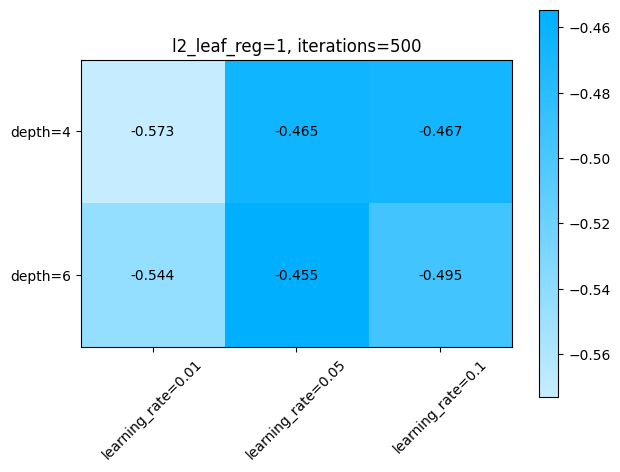

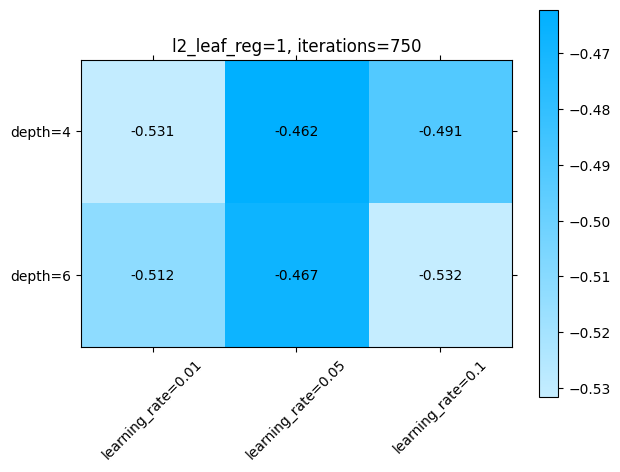

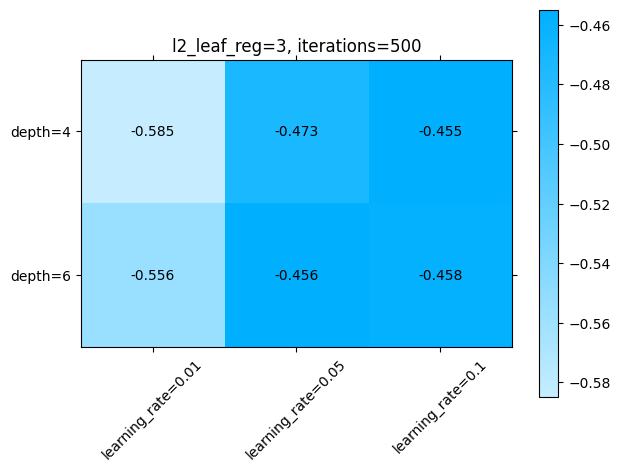

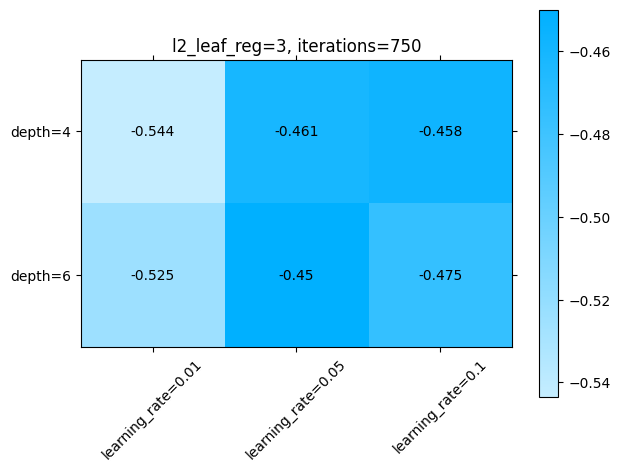

In [10]:
model = trainer.train_cat_boost_classifier(X_train, y_train, X_test, y_test, params)